# 時系列データ

In [2]:
import numpy as np
infile="/home/tsujimot/Work/LiteBIRD/20240515/dat/mtq_res.npz"
infile="/home/tsujimot/Work/LiteBIRD/20240515/dat/mtq_res_background.npz"
x=np.load(infile)["arr_0"]
y=np.load(infile)["arr_1"]
z=np.load(infile)["arr_2"]

In [3]:
import datetime
t0=datetime.datetime(2023,10,13,16,0,0,0)
ts=[t0]
Ns=len(z)
for i in range(1,Ns):
    ts.append(t0 + datetime.timedelta(seconds=i))
ns=range(Ns)

In [4]:
exp=[
    ["30%", datetime.datetime(2023,10,13,16,0,0), datetime.datetime(2023,10,13,16,5,0)],
    ["40%", datetime.datetime(2023,10,13,16,5,0), datetime.datetime(2023,10,13,16,10,0)],
    ["70%", datetime.datetime(2023,10,13,16,10,0), datetime.datetime(2023,10,13,16,15,0)],
    ["30%", datetime.datetime(2023,10,13,16,22,0), datetime.datetime(2023,10,13,16,28,0)],
    ["40%", datetime.datetime(2023,10,13,16,28,0), datetime.datetime(2023,10,13,16,32,0)],
    ["70%", datetime.datetime(2023,10,13,16,32,0), datetime.datetime(2023,10,13,16,37,0)],
]

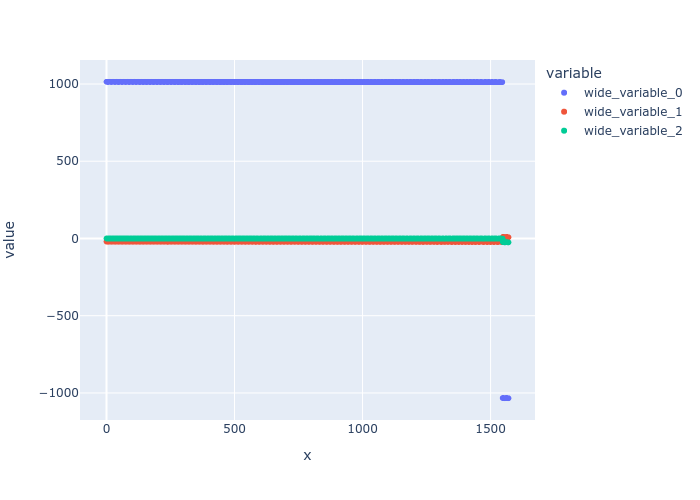

In [35]:
import plotly.express as px
from IPython.display import Image
fig = px.scatter(x=ns, y=[x[:,0], y[:,0], z[:,0]])
fig.write_image("f01.png")
fig.show()
Image("f01.png")

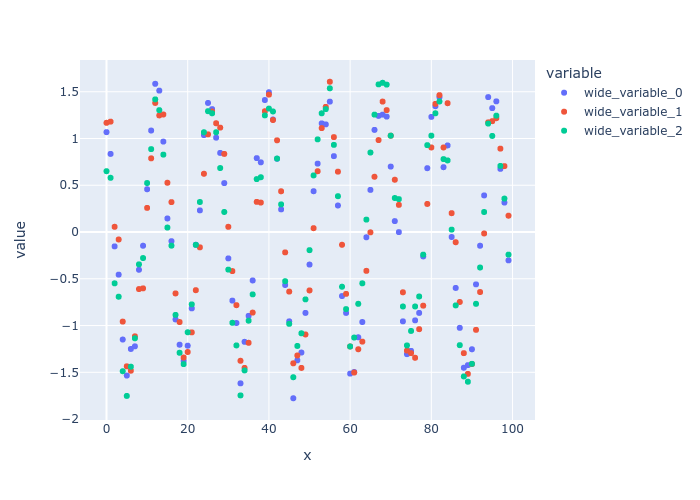

In [36]:
i_start=0
i_stop=100
xp=x[i_start:i_stop,0]
yp=y[i_start:i_stop,0]
zp=z[i_start:i_stop,0]
xpp=(xp-np.mean(xp))/np.std(xp)
ypp=(yp-np.mean(yp))/np.std(yp)
zpp=(zp-np.mean(zp))/np.std(zp)

fig = px.scatter(x=ns[i_start:i_stop], y=[xpp, ypp, zpp])
fig.write_image("f02.png")
fig.show()
Image("f02.png")

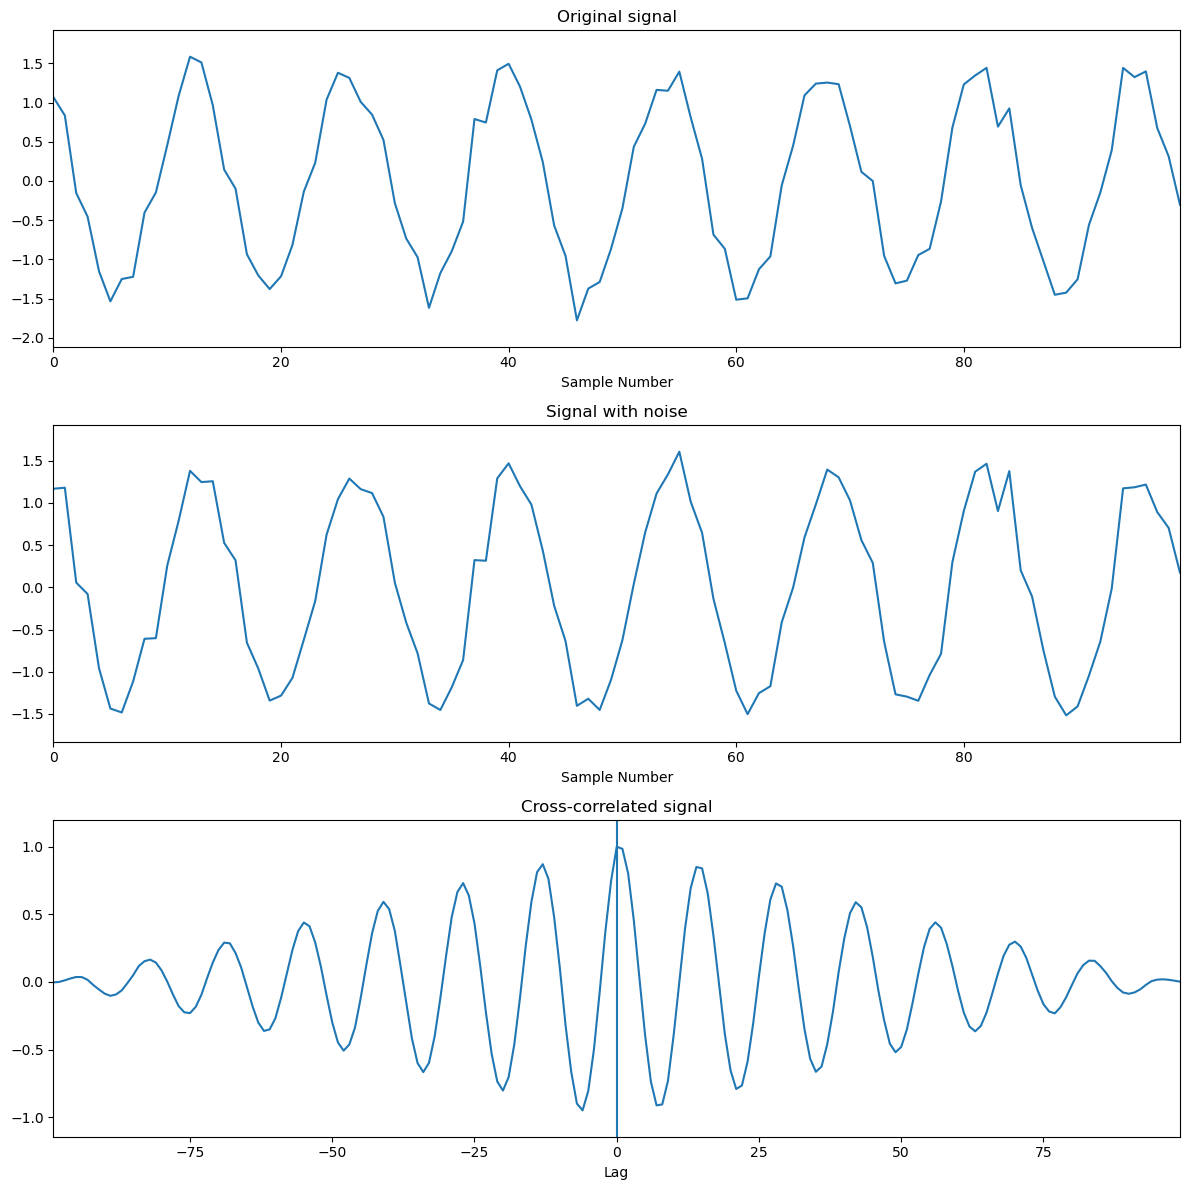

In [27]:
from scipy import signal
import matplotlib.pyplot as plt
corr = signal.correlate(ypp, xpp)
lags = signal.correlation_lags(len(xpp), len(ypp))
corr /= np.max(corr)

fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, figsize=(12, 12))
ax_orig.plot(xpp)
ax_orig.set_title('Original signal')
ax_orig.set_xlabel('Sample Number')
ax_noise.plot(ypp)
ax_noise.set_title('Signal with noise')
ax_noise.set_xlabel('Sample Number')
ax_corr.plot(lags, corr)
ax_corr.set_title('Cross-correlated signal')
ax_corr.set_xlabel('Lag')
ax_orig.margins(0, 0.1)
ax_noise.margins(0, 0.1)
ax_corr.margins(0, 0.1)
ax_corr.axvline(0)
fig.tight_layout()
plt.show()